In [2]:
import importlib
import numpy as np
import kRR_modified
# importlib.reload(kRR_modified)
from kRR_modified import KernelRidge

KRR = KernelRidge('gaussian')

In [27]:
rng = np.random.default_rng(504)

Generator(PCG64)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
n = 30#times
data = 1000
norm1 = np.zeros([3,n])
norm2 = np.zeros([3,n])
norm3 = np.zeros([3,n])

scaler = StandardScaler()

def random_generate(k):
    if k == 0:
        x_data = np.random.random((data, 100))
        y_label = np.random.random(data)
    elif k == 1:
        x_data = np.random.gamma(2,2,(data, 100))
        y_label = np.random.gamma(1,2,data)
    elif k == 2:
        x_data = np.random.normal(0,1,(data, 100))
        y_label = np.random.normal(0,1,data)
    x_data = scaler.fit_transform(x_data)
    return x_data, y_label

for i in range(0,n):
    KRR = KernelRidge('quadratic')
    for line in range(0,3):
        x_data,y_label = random_generate(line)#sim) #random.randint(0,2))
        Kernel = KRR.compute_kernel_matrix(x_data, x_data)
        r = 100
        p = 5
        R = r + p
        P = rng.normal(0, 1, (1000, R))
        Z = np.matmul(Kernel, P)
        Q, R = np.linalg.qr(Z)
        Y = np.matmul(Q.T, Kernel)
        u, s, vh = np.linalg.svd(Y, full_matrices=False)
        U = np.matmul(Q, u)
        Kernel_approx = np.matmul(np.matmul(U, np.diag(s)), vh)
        norm1[line][i] = np.linalg.norm(Kernel - Kernel_approx)
        x_data,y_label = random_generate(line)#sim) #random.randint(0,2))
        Kernel = KRR.compute_kernel_matrix(x_data, x_data)
        r = 500
        R = r + p
        P = rng.normal(0, 1, (1000, R))
        Z = np.matmul(Kernel, P)
        Q, R = np.linalg.qr(Z)
        Y = np.matmul(Q.T, Kernel)
        u, s, vh = np.linalg.svd(Y, full_matrices=False)
        U = np.matmul(Q, u)
        Kernel_approx = np.matmul(np.matmul(U, np.diag(s)), vh)
        norm2[line][i] = np.linalg.norm(Kernel - Kernel_approx)
        x_data,y_label = random_generate(line)#sim) #random.randint(0,2))
        Kernel = KRR.compute_kernel_matrix(x_data, x_data)
        r = 1000
        R = r + p
        P = rng.normal(0, 1, (1000, R))
        Z = np.matmul(Kernel, P)
        Q, R = np.linalg.qr(Z)
        Y = np.matmul(Q.T, Kernel)
        u, s, vh = np.linalg.svd(Y, full_matrices=False)
        U = np.matmul(Q, u)
        Kernel_approx = np.matmul(np.matmul(U, np.diag(s)), vh)
        norm3[line][i] = np.linalg.norm(Kernel - Kernel_approx)

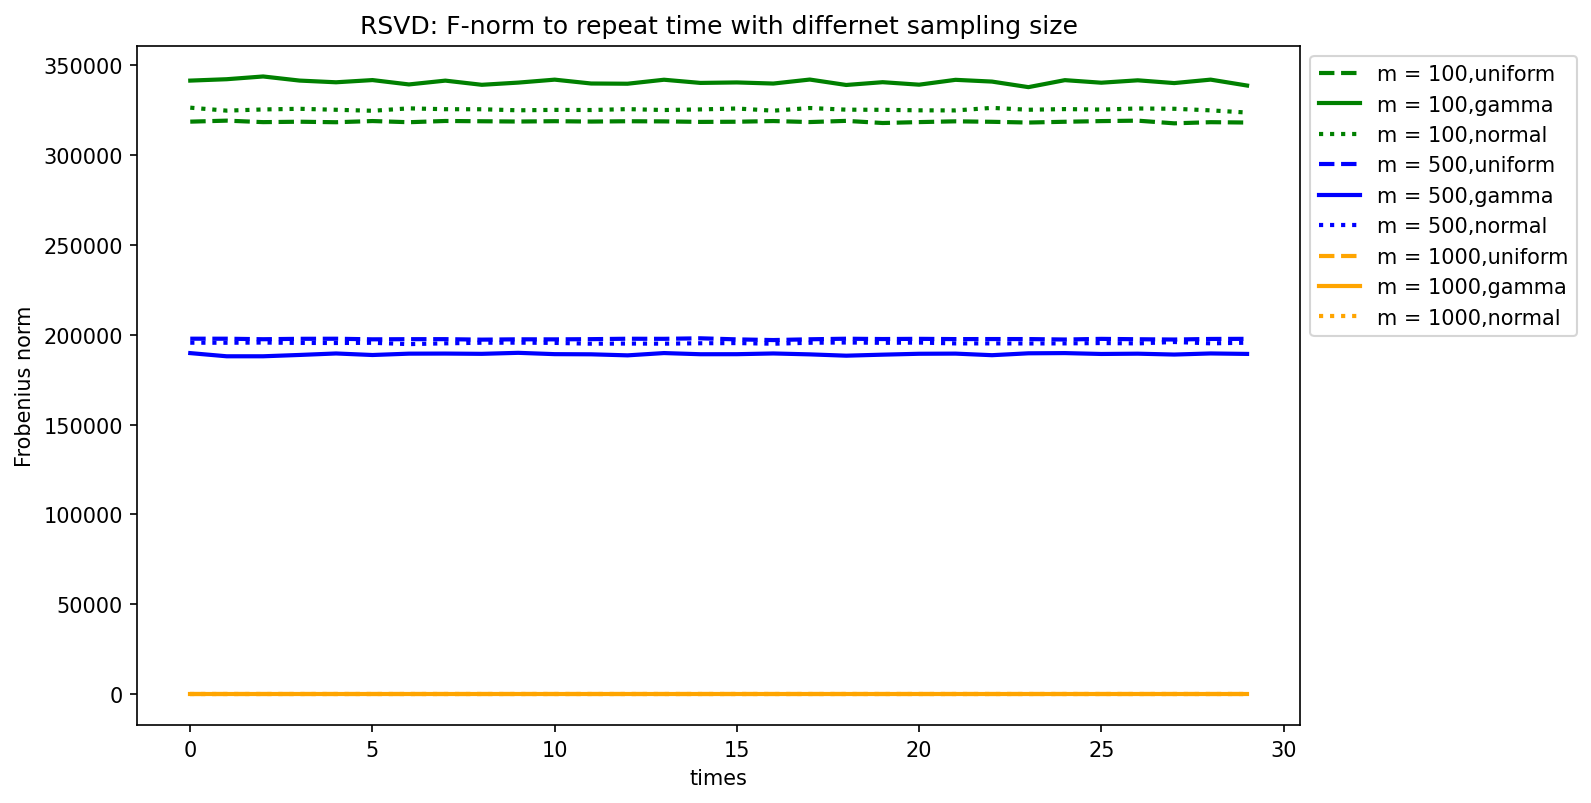

In [26]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(norm1[0],label = 'm = 100,uniform',lw = 2,c = 'green', ls = '--')
plt.plot(norm1[1],label = 'm = 100,gamma',lw = 2,c = 'green', ls = '-')
plt.plot(norm1[2],label = 'm = 100,normal',lw = 2,c = 'green', ls = ':')
plt.plot(norm2[0],label = 'm = 500,uniform',lw = 2,c = 'blue', ls = '--')
plt.plot(norm2[1],label = 'm = 500,gamma',lw = 2,c = 'blue', ls = '-')
plt.plot(norm2[2],label = 'm = 500,normal',lw = 2,c = 'blue', ls = ':')
plt.plot(norm3[0],label = 'm = 1000,uniform',lw = 2,c = 'orange', ls = '--')
plt.plot(norm3[1],label = 'm = 1000,gamma',lw = 2,c = 'orange', ls = '-')
plt.plot(norm3[2],label = 'm = 1000,normal',lw = 2,c = 'orange', ls = ':')
plt.legend(loc = 2,bbox_to_anchor = (1,1),ncol = 1)
plt.title('RSVD: F-norm to repeat time with differnet sampling size')
plt.xlabel('times')
plt.ylabel('Frobenius norm')
plt.show()
fig.savefig('rsvd_qua_fig1.png')

In [22]:
print(norm3[2])

NameError: name 'norm3' is not defined

In [16]:
import importlib
import numpy as np
import kRR_modified
# importlib.reload(kRR_modified)
from kRR_modified import KernelRidge
import numpy as np
import matplotlib.pyplot as plt
import random
data = 1000

KRR = KernelRidge('gaussian')
rng = np.random.default_rng(504)
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)
np.linalg.matrix_rank(Kernel)
norm_gauss =[]
x = range(50,data+1,10)
for i in range(50,data+1,10):
        r = i
        p = 5
        R = r + p
        P = rng.normal(0, 1, (1000, R))
        Z = np.matmul(Kernel, P)
        Q, R = np.linalg.qr(Z)
        Y = np.matmul(Q.T, Kernel)
        u, s, vh = np.linalg.svd(Y, full_matrices=False)
        U = np.matmul(Q, u)
        Kernel_approx = np.matmul(np.matmul(U, np.diag(s)), vh)
        norm_gauss.append(np.linalg.norm(Kernel - Kernel_approx))

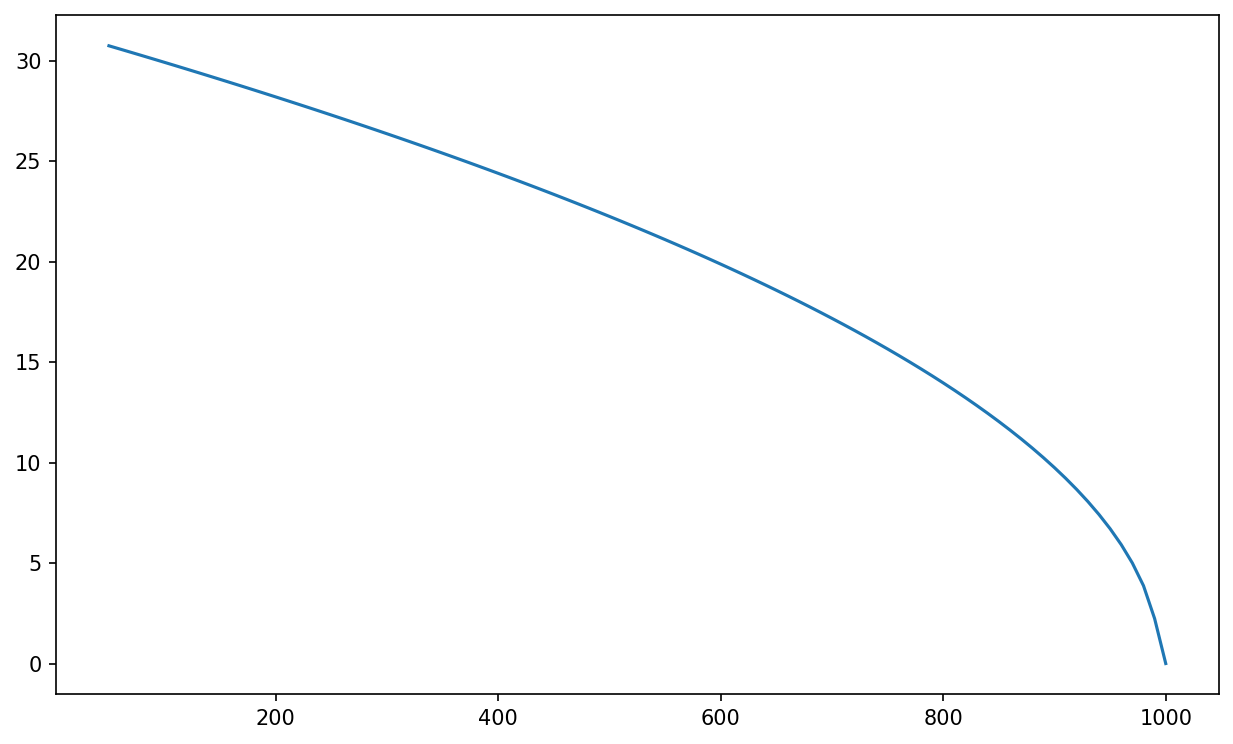

In [17]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,norm_gauss)
plt.show()

In [10]:
KRR = KernelRidge('linear')
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)
print(np.linalg.matrix_rank(Kernel))
x2 = range(50,data-700+1,10)# np.linspace(50,data-800+1,10)
norm_lin = []
for i in range(50,data-700+1,10):
    r = i
    p = 5
    R = r + p
    P = rng.normal(0, 1, (1000, R))
    Z = np.matmul(Kernel, P)
    Q, R = np.linalg.qr(Z)
    Y = np.matmul(Q.T, Kernel)
    u, s, vh = np.linalg.svd(Y, full_matrices=False)
    U = np.matmul(Q, u)
    Kernel_approx = np.matmul(np.matmul(U, np.diag(s)), vh)
    norm_lin.append(np.linalg.norm(Kernel - Kernel_approx))


100


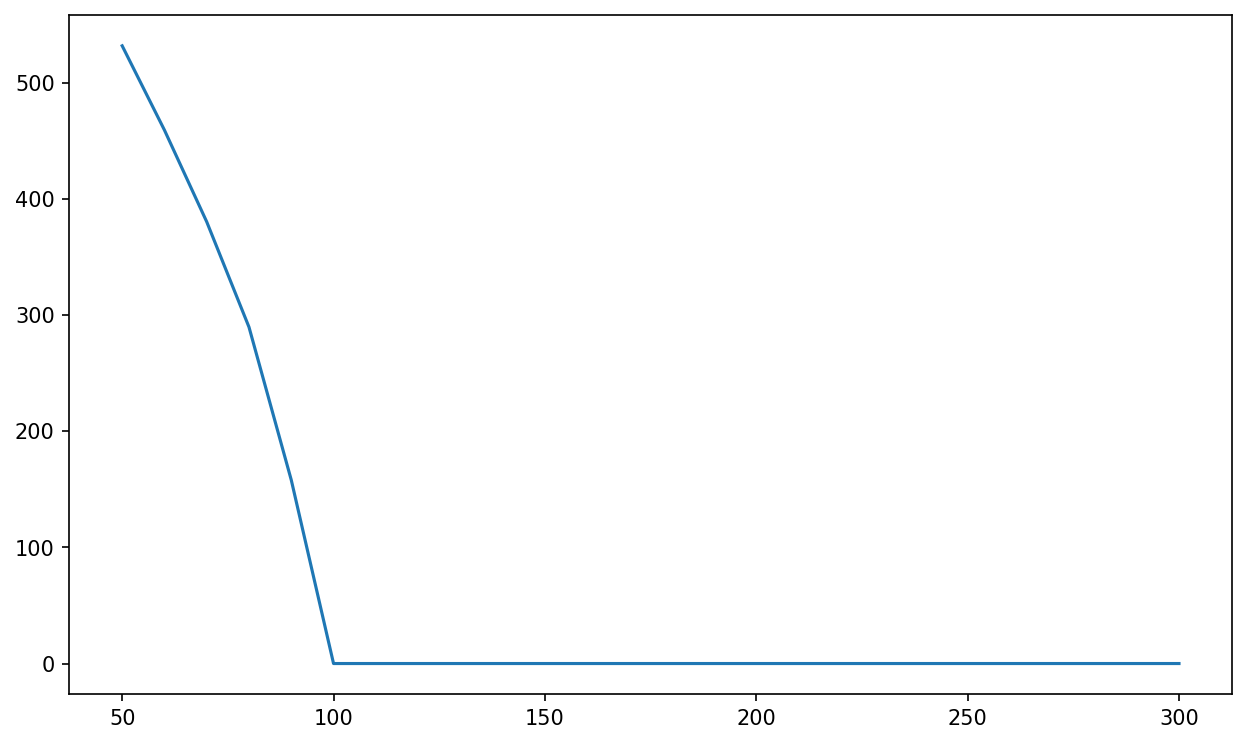

In [11]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x2,norm_lin)
plt.show()

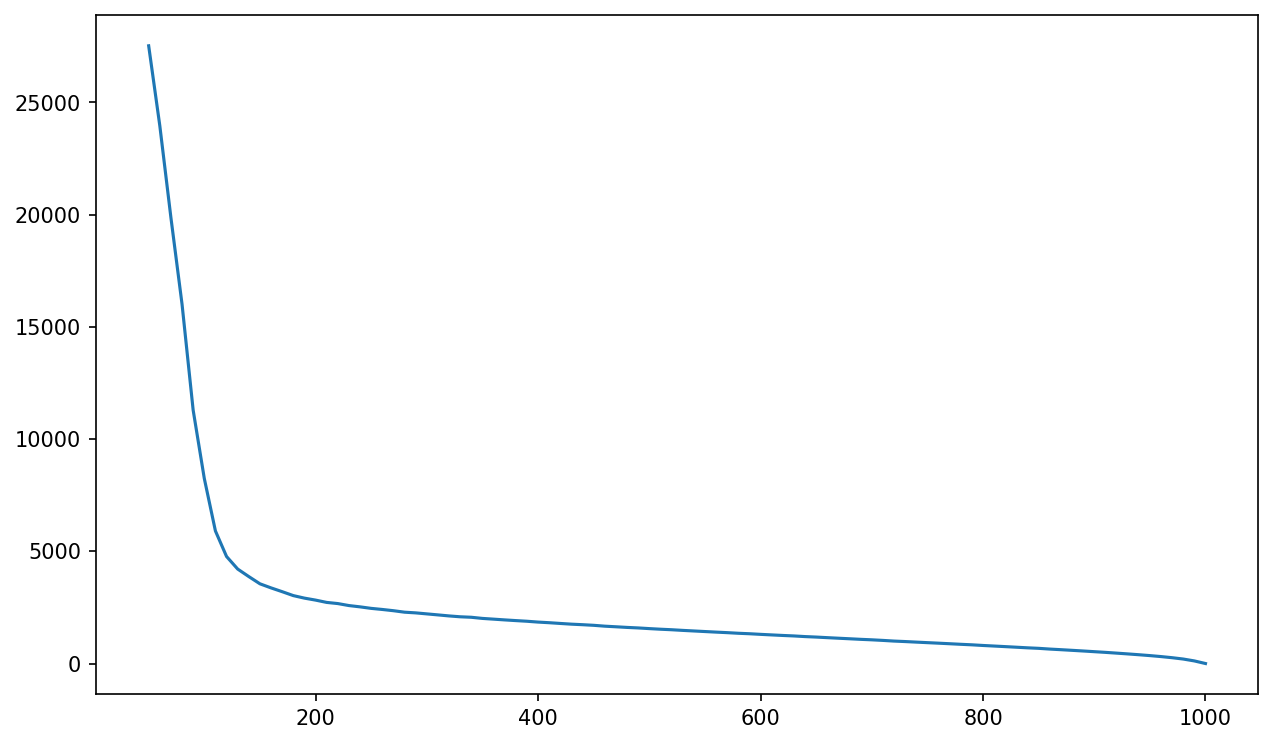

In [12]:
KRR = KernelRidge('quadratic')
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)

norm_qua =[]
x = np.arange(50,data+1,10)
for i in range(50,data+1,10):
    r = i
    p = 5
    R = r + p
    P = rng.normal(0, 1, (1000, R))
    Z = np.matmul(Kernel, P)
    Q, R = np.linalg.qr(Z)
    Y = np.matmul(Q.T, Kernel)
    u, s, vh = np.linalg.svd(Y, full_matrices=False)
    U = np.matmul(Q, u)
    Kernel_approx = np.matmul(np.matmul(U, np.diag(s)), vh)
    norm_qua.append(np.linalg.norm(Kernel - Kernel_approx))

fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,norm_qua)
plt.show()

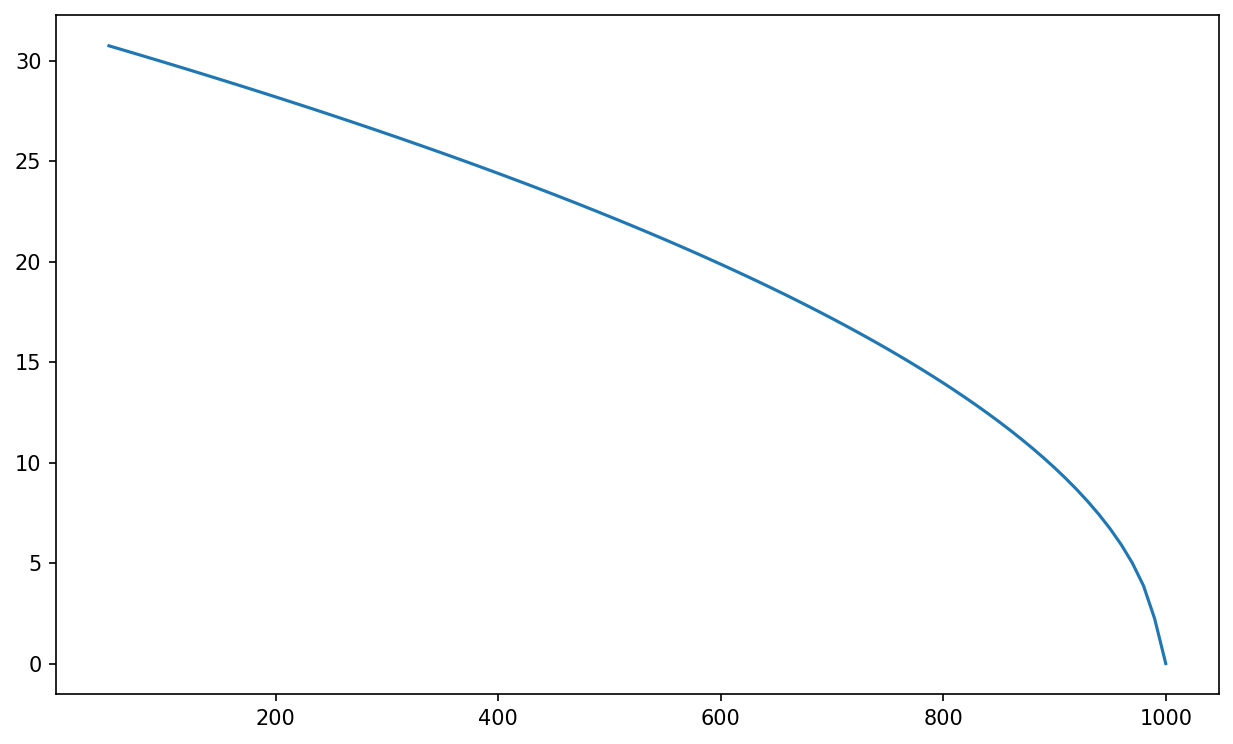

In [13]:
KRR = KernelRidge('laplacian')
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)
np.linalg.matrix_rank(Kernel)
norm_lap =[]

x = np.arange(50,data+1,10)
for i in range(50,data+1,10):
    r = i
    p = 5
    R = r + p
    P = rng.normal(0, 1, (1000, R))
    Z = np.matmul(Kernel, P)
    Q, R = np.linalg.qr(Z)
    Y = np.matmul(Q.T, Kernel)
    u, s, vh = np.linalg.svd(Y, full_matrices=False)
    U = np.matmul(Q, u)
    Kernel_approx = np.matmul(np.matmul(U, np.diag(s)), vh)
    norm_lap.append(np.linalg.norm(Kernel - Kernel_approx))
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,norm_lap)
plt.show()

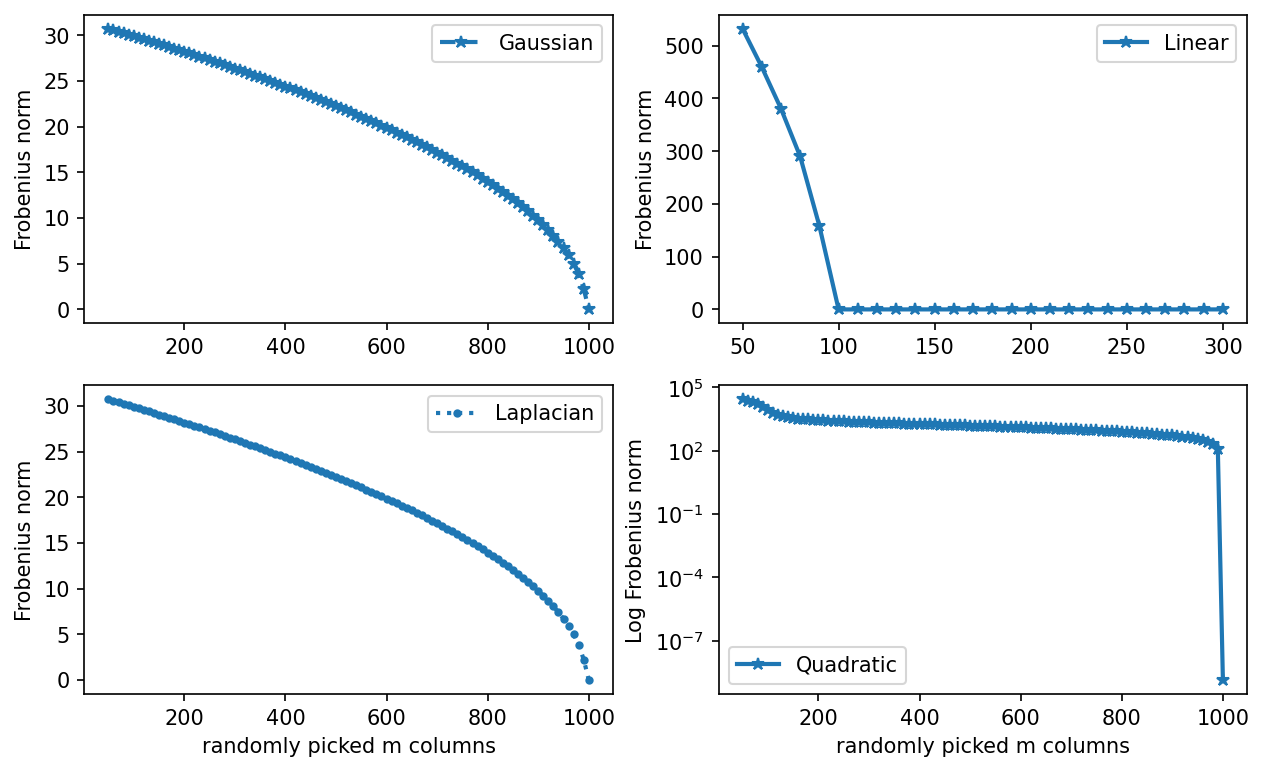

In [21]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.title('Nystroem: F-norm vs. picked columns m with different kernel methods')
plt.subplot(2,2,1)
plt.plot(x,norm_gauss,label = 'Gaussian',lw = 2,ls = '--',marker = '*')
plt.legend()
plt.ylabel('Frobenius norm')
plt.subplot(2,2,2)
plt.plot(x2,norm_lin,label = 'Linear',lw = 2,marker = '*')
plt.ylabel('Frobenius norm')
plt.legend()
plt.subplot(2,2,3)
plt.plot(x,norm_lap,label = 'Laplacian',lw =2,ls = ':',marker = '.')
plt.legend()
plt.xlabel('randomly picked m columns')
plt.ylabel('Frobenius norm')
plt.subplot(2,2,4)
plt.plot(x,norm_qua,label = 'Quadratic',lw = 2,marker = '*')
plt.legend()
plt.semilogy()
plt.xlabel('randomly picked m columns')
plt.ylabel('Log Frobenius norm')

plt.show()
fig.savefig('rsvd_fig2.png')